In [71]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.rcParams["figure.figsize"] = "15, 8"

import pandas as pd
import numpy as np

In [7]:
#http://stackoverflow.com/questions/8897593/similarity-between-two-text-documents
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [8]:
lines = []
with open('sotu.txt') as f:
    for line in f:
        lines.append(line.strip())

lines = [line for line in lines if line != '\n' and line != '']
lines.append('')

stars = [i for i, x in enumerate(lines) if x == '***']
# last line of file
stars.append(len(lines) - 1)

def president(i):
    return ' '.join(lines[stars[i] + 2 : stars[i] + 3]).strip()

def date(i):
    return ' '.join(lines[stars[i] + 3 : stars[i] + 4]).strip()

def speech(i):
    return ' '.join(lines[stars[i] + 4 : stars[i + 1]]).strip()

In [43]:
def rolling_similarity(end_time):
    similarities = []
    for i in range(end_time):
        similarities.append(cosine_sim(speech(i), speech(i + 1)))
    return similarities

In [44]:
diff_one_series = rolling_similarity(223)

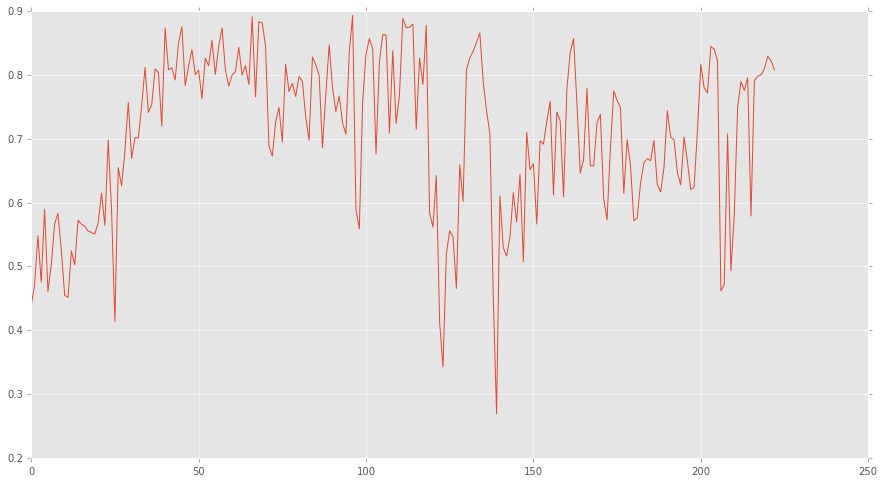

In [85]:
plt.plot(diff_one_series)

In [96]:
np.sort(diff_one_series)[:-1][:10]

array([ 0.26909885,  0.34253401,  0.41171552,  0.41380018,  0.43810108,
        0.45164537,  0.45481508,  0.45583735,  0.46047781,  0.46178195])